In [80]:
# extracting zip file from drive inside content folder
import zipfile
zip_ref = zipfile.ZipFile('/content/charts.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [81]:
# importing required library 
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import shutil

In [82]:
# read the CSV file into a pandas dataframe
df = pd.read_csv('./charts/train_val.csv')
#df.head()

In [83]:
# Define the directory where the original chart images are located
source_dir = './charts/train_val/'

# Define the directory where the separate folders will be created
base_dir = './charts/training/'

test_dir = './charts/test'

# Get the distinct values from a specific column type and define the categories of the chart images
categories = df['type'].unique()

# print the distinct values
print("Chart categories: ",categories)

Chart categories:  ['vbar_categorical' 'hbar_categorical' 'line' 'pie' 'dot_line']


In [84]:
# Step1 : doing image classification
# Creating directory and moving data to specific category of charts folder
if os.path.isdir(base_dir):
    print("Directory is already created.")
else:
    # iterate over the rows in the dataframe and categorising the data set to specific classes of chart
    for image_index, row in df.iterrows():
      # extract the filename and label from the row
      filename = str(row['image_index'])+('.png')
      category = row['type']
      if category in categories and os.path.exists(base_dir+category):
        #print("Directory exists!")
        shutil.move(source_dir + filename, base_dir + category + '/' + filename)
      else:
        #print("Directory does not exist!")  
        os.makedirs(base_dir + category)
        shutil.move(source_dir + filename, base_dir + category + '/' + filename)

Directory is already created.


In [85]:
import tensorflow as tf
import numpy as np

# Set the input size of the images
img_width, img_height = 128, 128

# pre-processing the data
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.2
)

# Split the data into training set as 80%
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height,img_width),
    batch_size=64,
    subset='training'
)
# Split the data into testing sets as 20%
test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height,img_width),
    batch_size=64,
    subset='validation'
)

Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


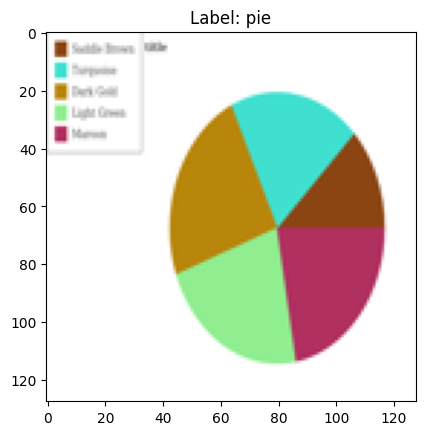

In [86]:
# Get the first batch of test data and it's label 
x_batch, y_batch = next(test_datagen)

# Show the first image in the batch
img = x_batch[5]
# map the categories to the labels 
label_map = {0: 'vbar_categorical', 1: 'hbar_categorical', 2: 'line', 3: 'pie', 4: 'dot_line'}
label = np.argmax(y_batch[5])
plt.title('Label: ' + str(label_map[label]))
plt.imshow(img)
plt.show()

In [96]:
# Define the model architecture
model = tf.keras.models.Sequential([
  
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten the output of the second convolutional layer
    tf.keras.layers.Flatten(),

    # Dense output layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_datagen , epochs=10, validation_data=test_datagen)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_datagen)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/10
13/13 [==============================] - 37s 3s/step - loss: 5.5196 - accuracy: 0.2188 - val_loss: 1.5136 - val_accuracy: 0.2000
Epoch 2/10
13/13 [==============================] - 30s 2s/step - loss: 0.9223 - accuracy: 0.6375 - val_loss: 0.6762 - val_accuracy: 0.7200
Epoch 4/10
13/13 [==============================] - 30s 2s/step - loss: 0.5103 - accuracy: 0.7625 - val_loss: 0.4588 - val_accuracy: 0.7650
Epoch 5/10
13/13 [==============================] - 31s 2s/step - loss: 0.4478 - accuracy: 0.7987 - val_loss: 0.4213 - val_accuracy: 0.8100
Epoch 6/10
13/13 [==============================] - 30s 2s/step - loss: 0.3828 - accuracy: 0.7887 - val_loss: 0.3761 - val_accuracy: 0.8750
Epoch 7/10
13/13 [==============================] - 30s 2s/step - loss: 0.3445 - accuracy: 0.8425 - val_loss: 0.3539 - val_accuracy: 0.8350
Epoch 8/10
13/13 [==============================] - 30s 2s/step - loss: 0.3281 - accuracy: 0.8587 - val_loss: 0.3078 - val_accuracy: 0.8900
Epoch 9/10
13/13 [==

In [97]:
# Make predictions with the model
predictions = model.predict(test_datagen)
print(predictions)

4/4 [==============================] - 3s 639ms/step
[[5.18177956e-07 9.97615755e-01 1.19597643e-09 8.96307814e-04
  1.48743787e-03]
 [7.44105458e-01 2.28493005e-01 1.32538285e-02 3.60585400e-03
  1.05419150e-02]
 [1.62109733e-01 6.49450812e-03 8.25247228e-01 1.36269967e-03
  4.78574820e-03]
 [6.87579313e-06 9.99933302e-01 3.14766407e-10 5.17193585e-05
  7.94445623e-06]
 [7.75361359e-01 3.92204411e-02 1.58762380e-01 4.05245088e-03
  2.26032957e-02]
 [1.16294717e-11 6.53723895e-04 7.66047603e-22 9.99346197e-01
  7.14944903e-08]
 [2.00063794e-12 9.99998510e-01 8.94761398e-20 1.37590030e-06
  1.53692703e-08]
 [5.48005276e-16 3.28220722e-06 1.06922255e-18 1.51178629e-05
  9.99981582e-01]
 [1.44489441e-05 9.96731937e-01 3.80085083e-07 7.01699832e-07
  3.25241592e-03]
 [7.04258263e-01 1.42876999e-02 2.78211862e-01 1.75677624e-03
  1.48531096e-03]
 [1.23048012e-04 9.99732494e-01 3.90033755e-10 1.44395963e-04
  7.11479586e-08]
 [3.52838248e-01 9.52913612e-03 6.30824506e-01 1.25282793e-03
  5.5

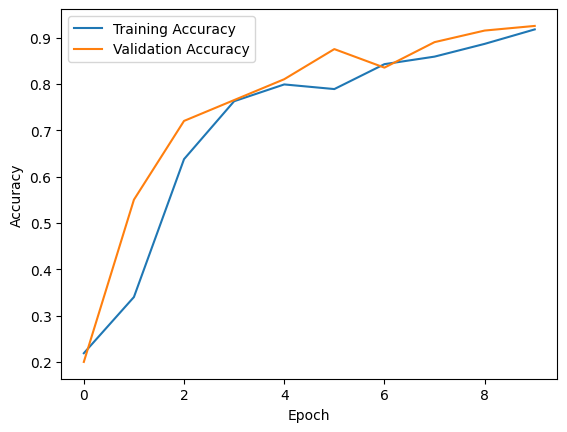

In [98]:
#Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()